In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/IvanVC21/Tijuana-house-prices/main/tijuana_prices.csv'
df = pd.read_csv(url)

In [ ]:
df.head(10)

,price,currency,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon
0,150000.0,USD,4.0,2.0,3.0,130.0,"Las Americas, Tijuana",32.500975,-116.896457
1,774900.0,USD,3.0,3.0,2.0,550.0,"Hacienda Agua Caliente, Tijuana",32.488683,-116.999223
2,3000000.0,MN,3.0,2.0,2.0,107.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
3,385000.0,USD,4.0,3.0,3.0,350.0,"Xicotencatl Leyva, Tijuana",32.538363,-116.931519
4,70000.0,USD,2.0,1.0,1.0,80.0,"Vaim, Tijuana",32.493642,-116.942191
5,528000.0,USD,4.0,2.0,2.0,398.0,"Playas de Tijuana, Tijuana",32.511290,-117.091176
6,4200000.0,MN,3.0,2.0,2.0,150.0,"Roma, Tijuana",32.531941,-117.037896
7,900000.0,MN,2.0,1.0,1.0,142.0,"Real de San Francisco, Tijuana",32.486000,-116.854223
8,2550000.0,MN,3.0,2.0,2.0,140.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
9,2250000.0,MN,3.0,2.0,2.0,103.0,"Santa Fe, Tijuana",32.494586,-116.962982


In [ ]:
df.shape

(888, 9)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

parkingSpots    89
bathrooms       21
bedrooms        11
propertySize     3
price            1
dtype: int64

In [ ]:
df['parkingSpots'].fillna(1 , inplace=True)

In [ ]:
df.dropna(inplace=True)
df.isnull().sum() 

price           0
currency        0
bedrooms        0
bathrooms       0
parkingSpots    0
propertySize    0
neighborhood    0
lat             0
lon             0
dtype: int64

In [ ]:
print("% of neighborhoods listed as 'Tijuana, Baja California':", (df['neighborhood'].value_counts().max()/866)*100)

% of neighborhoods listed as 'Tijuana, Baja California': 33.48729792147806


In [ ]:
df = df.drop(df.index[df['neighborhood'] == 'Tijuana, Baja California Norte'])

In [ ]:
df.shape

(576, 9)

In [ ]:
df_mn = df[df['currency'] == 'MN']
df_mn.head()

,price,currency,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon
2,3000000.0,MN,3.0,2.0,2.0,107.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
6,4200000.0,MN,3.0,2.0,2.0,150.0,"Roma, Tijuana",32.531941,-117.037896
7,900000.0,MN,2.0,1.0,1.0,142.0,"Real de San Francisco, Tijuana",32.486000,-116.854223
8,2550000.0,MN,3.0,2.0,2.0,140.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
9,2250000.0,MN,3.0,2.0,2.0,103.0,"Santa Fe, Tijuana",32.494586,-116.962982


In [ ]:
df_mn = df_mn.apply(lambda x: x / 20 if x.name == 'price' else x)
df_mn.head()

,price,currency,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon
2,150000.0,MN,3.0,2.0,2.0,107.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
6,210000.0,MN,3.0,2.0,2.0,150.0,"Roma, Tijuana",32.531941,-117.037896
7,45000.0,MN,2.0,1.0,1.0,142.0,"Real de San Francisco, Tijuana",32.486000,-116.854223
8,127500.0,MN,3.0,2.0,2.0,140.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
9,112500.0,MN,3.0,2.0,2.0,103.0,"Santa Fe, Tijuana",32.494586,-116.962982


In [ ]:
df = df.drop(df.index[df['currency'] == 'MN'])
df.shape

(283, 9)

In [ ]:
prices = [df, df_mn]
df = pd.concat(prices).sort_index()



In [ ]:
df.head()

,price,currency,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon
0,150000.0,USD,4.0,2.0,3.0,130.0,"Las Americas, Tijuana",32.500975,-116.896457
1,774900.0,USD,3.0,3.0,2.0,550.0,"Hacienda Agua Caliente, Tijuana",32.488683,-116.999223
2,150000.0,MN,3.0,2.0,2.0,107.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
3,385000.0,USD,4.0,3.0,3.0,350.0,"Xicotencatl Leyva, Tijuana",32.538363,-116.931519
4,70000.0,USD,2.0,1.0,1.0,80.0,"Vaim, Tijuana",32.493642,-116.942191


In [ ]:
df = df.drop(columns = ['currency'])

In [ ]:
df.dtypes

price           float64
bedrooms        float64
bathrooms       float64
parkingSpots    float64
propertySize    float64
neighborhood     object
lat             float64
lon             float64
dtype: object

In [ ]:
df.head()



,price,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon
0,150000.0,4.0,2.0,3.0,130.0,"Las Americas, Tijuana",32.500975,-116.896457
1,774900.0,3.0,3.0,2.0,550.0,"Hacienda Agua Caliente, Tijuana",32.488683,-116.999223
2,150000.0,3.0,2.0,2.0,107.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895
3,385000.0,4.0,3.0,3.0,350.0,"Xicotencatl Leyva, Tijuana",32.538363,-116.931519
4,70000.0,2.0,1.0,1.0,80.0,"Vaim, Tijuana",32.493642,-116.942191


In [ ]:
df.insert(8, "latSY", 32.5414378)
df.insert(9, "lonSY", -117.0275893)
df.insert(10, "latOT", 32.5457130)
df.insert(11, "lonOT", -116.9379029)

In [ ]:
df.dtypes

price           float64
bedrooms        float64
bathrooms       float64
parkingSpots    float64
propertySize    float64
neighborhood     object
lat             float64
lon             float64
latSY           float64
lonSY           float64
latOT           float64
lonOT           float64
dtype: object

In [ ]:
R = 6373.0
df['lat_rad'] = np.radians(df['lat'])
df['lon_rad'] = np.radians(df['lon'])
df['latSYrad'] = np.radians(df['latSY'])
df['lonSYrad'] = np.radians(df['lonSY'])
df['latOTrad'] = np.radians(df['latOT'])
df['lonOTrad'] = np.radians(df['lonOT'])

df['dlatSY'] = df['latSYrad'] - df['lat_rad']
df['dlonSY'] = df['lonSYrad'] - df['lon_rad']
df['dlatOT'] = df['latOTrad'] - df['lat_rad']
df['dlonOT'] = df['lonOTrad'] - df['lon_rad']

df['aSY'] =  np.sin(df['dlatSY'] / 2)**2 + np.cos(df['lat_rad']) * np.cos(df['latSYrad']) * np.sin(df['dlonSY'] / 2)**2
df['aOT'] =  np.sin(df['dlatOT'] / 2)**2 + np.cos(df['lat_rad']) * np.cos(df['latOTrad']) * np.sin(df['dlonOT'] / 2)**2
df['cSY'] = 2 * np.arctan2(np.sqrt(df['aSY']), np.sqrt(1 - df['aSY']))
df['cOT'] = 2 * np.arctan2(np.sqrt(df['aOT']), np.sqrt(1 - df['aOT']))

df['distance_SY (km)'] = R * df['cSY']
df['distance_OT (km)'] = R * df['cOT']





In [ ]:
df = df.drop(columns = ['latSY', 'lonSY', 'latOT', 'lonOT',
       'lat_rad', 'lon_rad', 'latSYrad', 'lonSYrad', 'latOTrad', 'lonOTrad',
       'dlatSY', 'dlonSY', 'dlatOT', 'dlonOT', 'aSY', 'aOT', 'cSY', 'cOT'])
df.head()

,price,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon,distance_SY (km),distance_OT (km)
0,150000.0,4.0,2.0,3.0,130.0,"Las Americas, Tijuana",32.500975,-116.896457,13.096252,6.314373
1,774900.0,3.0,3.0,2.0,550.0,"Hacienda Agua Caliente, Tijuana",32.488683,-116.999223,6.442931,8.562526
2,150000.0,3.0,2.0,2.0,107.0,"Lomas de La Presa, Tijuana",32.448786,-116.924895,14.107637,10.849984
3,385000.0,4.0,3.0,3.0,350.0,"Xicotencatl Leyva, Tijuana",32.538363,-116.931519,9.014845,1.013257
4,70000.0,2.0,1.0,1.0,80.0,"Vaim, Tijuana",32.493642,-116.942191,9.613405,5.805798


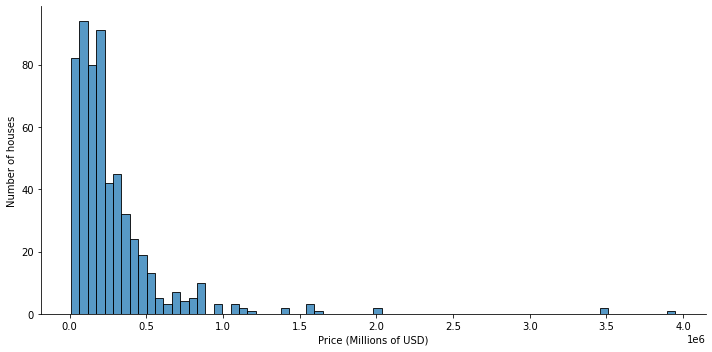

In [ ]:
dist = sns.displot(df.price, aspect = 2)
dist.set(xlabel = "Price (Millions of USD)", ylabel = "Number of houses")

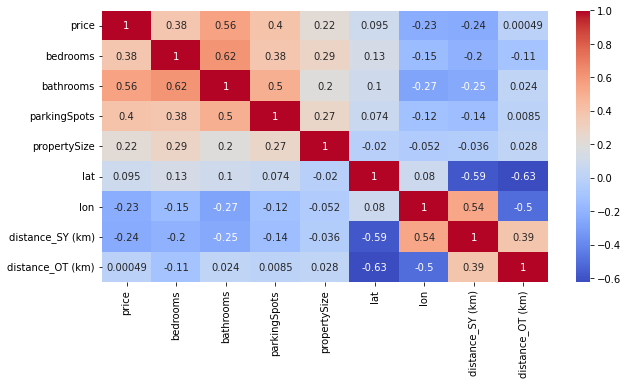

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

plt.show()

In [ ]:
max_threshold = df['price'].quantile(0.95)
max_threshold

835000.0

In [ ]:
df[df['price']>max_threshold]

,price,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon,distance_SY (km),distance_OT (km)
21,985000.0,4.0,4.0,2.0,818.0,"Lomas de Agua Caliente, Tijuana",32.499408,-116.989657,5.874703,7.077279
38,1590000.0,4.0,4.0,5.0,1490.0,"Hacienda Agua Caliente, Tijuana",32.488683,-116.999223,6.442931,8.562526
44,2000000.0,5.0,6.0,6.0,652.0,"Real del Mar, Tijuana",32.451725,-117.088234,11.486710,17.555111
50,3500000.0,4.0,7.0,7.0,1125.0,"Cumbres de Juarez, Tijuana",32.508715,-117.031595,3.659052,9.702559
58,1400000.0,6.0,4.0,6.0,807.0,"Hacienda Agua Caliente, Tijuana",32.488683,-116.999223,6.442931,8.562526
84,3950000.0,4.0,3.0,2.0,168.0,"Santa Fe, Tijuana",32.494586,-116.962982,7.992309,6.154112
111,1600000.0,4.0,8.0,3.0,650.0,"Cumbres de Juarez, Tijuana",32.508715,-117.031595,3.659052,9.702559
113,1100000.0,2.0,2.0,1.0,57.0,"Santa Fe, Tijuana",32.494586,-116.962982,7.992309,6.154112
117,3500000.0,4.0,7.0,7.0,1125.0,"Cumbres de Juarez, Tijuana",32.508715,-117.031595,3.659052,9.702559
119,2000000.0,5.0,6.0,6.0,652.0,"Real del Mar, Tijuana",32.451725,-117.088234,11.486710,17.555111


In [ ]:
min_threshold = df['price'].quantile(0.05)
min_threshold

28435.4625

In [ ]:
df[df['price']<min_threshold]

,price,bedrooms,bathrooms,parkingSpots,propertySize,neighborhood,lat,lon,distance_SY (km),distance_OT (km)
137,27791.85,2.0,1.0,1.0,200.0,"Residencial La Esperanza, Tijuana",32.481840,-117.004741,6.966864,9.475076
374,25168.70,3.0,1.0,1.0,150.0,"Villa Fontana , Tijuana",32.508846,-116.868948,15.313288,7.657272
537,9750.00,1.0,1.0,1.0,68.0,"Lomas del Refugio, Tijuana",32.463219,-116.827715,20.669994,13.821473
552,15750.00,1.0,1.0,1.0,125.0,"El Jibarito, Tijuana",32.477885,-117.074260,8.314692,14.849333
556,26000.00,3.0,1.0,1.0,73.0,"Real de San Francisco, Tijuana",32.486000,-116.854223,17.390964,10.281800
583,26250.00,3.0,2.0,1.0,73.0,"Lomas Virreyes, Tijuana",32.457582,-116.886617,16.183049,10.919768
592,15000.00,1.0,1.0,2.0,40.0,"El Jibarito, Tijuana",32.477885,-117.074260,8.314692,14.849333
607,23950.00,2.0,1.0,1.0,75.0,"El Laurel, Tijuana",32.463331,-116.835815,19.977853,13.254199
615,10000.00,1.0,1.0,2.0,125.0,"El Jibarito, Tijuana",32.477885,-117.074260,8.314692,14.849333
626,26250.00,2.0,1.0,1.0,90.0,"Hacienda Santa Maria, Tijuana",32.469177,-116.844651,18.949515,12.206025


In [ ]:
df2 = df[(df.price < max_threshold) & (df.price > min_threshold)]
df2.shape

(517, 10)

In [ ]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'parkingSpots', 'propertySize',
       'neighborhood', 'lat', 'lon', 'distance_SY (km)', 'distance_OT (km)'],
      dtype='object')

In [ ]:
x = df2[['bedrooms', 'bathrooms', 'parkingSpots', 'propertySize',
         'distance_SY (km)', 'distance_OT (km)']]
y = df2[['price']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:


from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ols = linear_model.LinearRegression()
ols.fit(x_train,y_train)
np.mean(cross_val_score(ols, x_train, y_train, cv = 5, scoring = "r2"))   

0.21430721509326167

In [ ]:


model = linear_model.Lasso()
print("Lasso regression score: ", np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5))

Lasso regression score:  0.21432


In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = [0.01, 0.1,0.5,0.75,1]
model = linear_model.Lasso()
grid_lasso = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid_lasso.fit(x_train, y_train)
print("Lasso regression best alpha value: ", grid_lasso.best_estimator_.alpha)
print("Lasso regression with hyperparameter tuning best score: ", np.round(grid_lasso.best_score_, 5))
print("Lasso regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_lasso.best_score_, 5))) * 100, 5)))



Lasso regression best alpha value:  1
Lasso regression with hyperparameter tuning best score:  0.21432
Lasso regression improvement after hyperparameter tuning: 0.0%


In [ ]:
model = linear_model.Ridge()
print("Ridge regression score: ", np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5))      
      

Ridge regression score:  0.21612


In [ ]:
alphas = [int(x) for x in np.linspace(1, 10, num = 20)]
model = linear_model.Ridge()
grid_ridge = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_ridge.fit(x_train, y_train)
print("Ridge regression best alpha value: ", grid_ridge.best_estimator_.alpha)
print("Ridge regression with hyperparameter tuning best score: ", np.round(grid_ridge.best_score_, 5))
print("Ridge regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_ridge.best_score_, 5))) * 100, 5)))

Ridge regression best alpha value:  10
Ridge regression with hyperparameter tuning best score:  0.22998
Ridge regression improvement after hyperparameter tuning: 6.02661%


In [ ]:
model = linear_model.ElasticNet()
print("Elastic Net regression score: ", np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5))

Elastic Net regression score:  0.28797


In [ ]:
alphas = np.array([0.01, 0.02, 0.025, 0.05,0.1,0.5,1])
model = linear_model.ElasticNet()
grid_elastic = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid_elastic.fit(x_train, y_train)

print("Elastic Net regression best alpha value: ", grid_elastic.best_estimator_.alpha)
print("Elastic Net regression with hyperparameter tuning best score: ", np.round(grid_elastic.best_score_, 5))
print("Elastic Net regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_elastic.best_score_, 5))) * 100, 5)))

Elastic Net regression best alpha value:  1.0
Elastic Net regression with hyperparameter tuning best score:  0.28797
Elastic Net regression improvement after hyperparameter tuning: 0.0%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
print("Random Forest regression score: ", np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5))      


Random Forest regression score:  0.70045


In [ ]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(25, 75, num = 3)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 4, 8],
               'min_samples_split': [2, 5,10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
print(param_grid)

{'n_estimators': [25, 50, 75], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
rf_Grid.fit(x_train, y_train.values.ravel())
print(rf_Grid.best_params_)
print("Random Forest regression with hyperparameter tuning best score: ", np.round(rf_Grid.best_score_, 5))
print("Random Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(rf_Grid.best_score_, 5))) * 100, 5)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Random Forest regression with hyperparameter tuning best score:  0.72458
Random Forest regression improvement after hyperparameter tuning: 3.7815%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
print("Gradient Booster regression score: ", np.round(np.mean(cross_val_score(gbr, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5))      


Gradient Booster regression score:  0.68416


In [ ]:
param_grid = {'n_estimators': [400, 500, 600],
               'learning_rate': [0.005, 0.01, 0.02],
               'max_depth': [1, 2, 4, 8],
               'subsample': [0.6, 0.8, 1]}
print(param_grid)

{'n_estimators': [400, 500, 600], 'learning_rate': [0.005, 0.01, 0.02], 'max_depth': [1, 2, 4, 8], 'subsample': [0.6, 0.8, 1]}


In [ ]:
model = GradientBoostingRegressor()
grid_gbr = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
grid_gbr.fit(x_train, y_train.values.ravel())
print(grid_gbr.best_params_)
print("Gradient Booster regression with hyperparameter tuning best score: ", np.round(grid_gbr.best_score_, 5))
print("Gradient Booster regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(gbr, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_gbr.best_score_, 5))) * 100, 5)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.6}
Gradient Booster regression with hyperparameter tuning best score:  0.71857
Gradient Booster regression improvement after hyperparameter tuning: 4.09285%


In [ ]:
import xgboost
xgb = xgboost.XGBRegressor()
np.mean(cross_val_score(xgb, x_train, y_train, cv = 5, scoring = "r2"))   

[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6822648233550022

In [ ]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(250, 500, num = 5)],
               'learning_rate': [0.01, 0.02, 0.03],
               'max_depth': [2, 4, 8],
               'colsample_bytree': [0.5,0.75, 1],
               'subsample': [0.6,0.8, 1]}
print(param_grid)

{'n_estimators': [250, 312, 375, 437, 500], 'learning_rate': [0.01, 0.02, 0.03], 'max_depth': [2, 4, 8], 'colsample_bytree': [0.5, 0.75, 1], 'subsample': [0.6, 0.8, 1]}


In [ ]:
model = xgboost.XGBRegressor()
grid_xgb = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
grid_xgb.fit(x_train, y_train)
print(grid_xgb.best_params_)
print("XGBoost regression with hyperparameter tuning best score: ", np.round(grid_xgb.best_score_, 5))
print("XGBoost Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(xgb, x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_xgb.best_score_, 5))) * 100, 5)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[04:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 312, 'subsample': 0.8}
XGBoost regression with hyperparameter tuning best score:  0.7386
[04:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBo

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_train)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, X_poly, y_train, cv=5, scoring = "r2"))
cv_scores=[]
degrees =[2,3,4, 5]
for degree in degrees:
    cv_scores.append(create_polynomial_regression_model(degree))
    
print(max(cv_scores))
    

-199.4267363491744


Text(0.5, 1.0, 'R2 VS Degree')

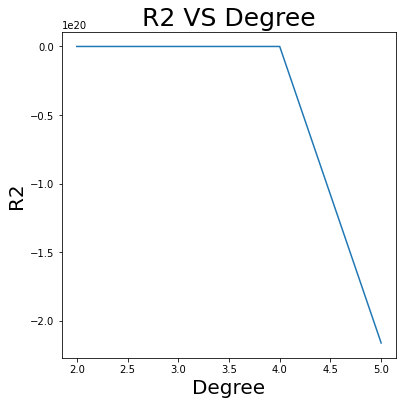

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(degrees,cv_scores)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('R2',fontsize=20)
ax.set_title('R2 VS Degree',fontsize=25)

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly = LinearRegression()
poly.fit(x_train, y_train)


LinearRegression()

In [ ]:
ols_yhat = ols.predict(x_test)
lasso_yhat  = grid_lasso.best_estimator_.predict(x_test)
ridge_yhat = grid_ridge.best_estimator_.predict(x_test)
elastic_yhat = grid_elastic.best_estimator_.predict(x_test)
forest_yhat = rf_Grid.best_estimator_.predict(x_test)
gbr_yhat = grid_gbr.predict(x_test)
xgb_yhat = grid_xgb.predict(x_test)
poly_yhat = poly.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Ordinary Least Square accuracy: %.2f" % r2_score(y_test, ols_yhat) )
print("Lasso regression accuracy: %.2f" % r2_score(y_test, lasso_yhat) )
print("Ridge regression accuracy: %.2f" % r2_score(y_test, ridge_yhat) )
print("Elastic net regression accuracy: %.2f" % r2_score(y_test, elastic_yhat) )
print("Random forest regression accuracy: %.2f" % r2_score(y_test, forest_yhat) )
print("Gradient Booster regression accuracy: %.2f" % r2_score(y_test, gbr_yhat) )
print("XGBoost regression accuracy: %.2f" % r2_score(y_test, xgb_yhat) )
print("Polynomial regression accuracy: %.2f" % r2_score(y_test, poly_yhat) )

Ordinary Least Square accuracy: 0.37
Lasso regression accuracy: 0.37
Ridge regression accuracy: 0.37
Elastic net regression accuracy: 0.33
Random forest regression accuracy: 0.73
Gradient Booster regression accuracy: 0.77
XGBoost regression accuracy: 0.78
Polynomial regression accuracy: 0.37


In [ ]:
xgb_ytest =  y_test.reset_index(drop=True)
xgb_ypred = pd.DataFrame(xgb_yhat)
dfs = [xgb_ytest, xgb_ypred ]
xgb_df = pd.concat(dfs, axis = 1)
xgb_df.rename(columns = {0:'predictions'}, inplace = True)
xgb_df

,price,predictions
0,52342.55,68887.992188
1,39500.00,47437.121094
2,105000.00,101255.242188
3,87955.00,192858.015625
4,295000.00,263226.312500
...,...,...
99,137600.00,192614.500000
100,210000.00,207572.500000
101,60000.00,63406.292969
102,270000.00,240276.968750


In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [ ('gbr', GradientBoostingRegressor(learning_rate = 0.02, max_depth = 4, 
                                                 n_estimators = 600, subsample = 0.6)),
             ('rfr', RandomForestRegressor(bootstrap = 'False', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 75))]

stack = StackingRegressor(estimators = estimators, final_estimator = xgboost.XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.02, max_depth =8, 
                                                                                          n_estimators = 312, subsample = 0.8) )
stack.fit(x_train, y_train.values.ravel())


[04:01:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.02,
                                                         max_depth=4,
                                                         n_estimators=600,
                                                         subsample=0.6)),
                              ('rfr',
                               RandomForestRegressor(bootstrap='False',
                                                     max_depth=8,
                                                     max_features='sqrt',
                                                     n_estimators=75))],
                  final_estimator=XGBRegressor(colsample_bytree=0.5,
                                               learning_rate=0.02, max_depth=8,
                                               n_estimators=312,
                                               subsample=0.8))

In [ ]:
stack_yhat = stack.predict(x_test)

print("Stack regression accuracy: %.2f" % r2_score(y_test, stack_yhat) )

Stack regression accuracy: 0.67


In [ ]:
# 'bedrooms', 'bathrooms', 'parkingSpots', 'propertySize',  'distance_SY (km)', 'distance_OT (km)'

x = np.array([[4, 2, 1, 100, 3, 5 ]])
x = sc.fit_transform(x)


In [ ]:
y_pred = grid_xgb.predict(x)
y_pred

array([164241.47], dtype=float32)

In [ ]:
import pickle

In [ ]:
data = {"model": grid_xgb, "sc" : sc}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
sc = data["sc"]


[04:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = regressor_loaded.predict(x)
y_pred

array([164241.47], dtype=float32)